In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


# AM 307 HW3
## Author Elie Attias

# Question 1: Gradient based against evolution strategy

We consider the negative Ackley function in two dimensions : 

$$f(x,y) = -20\exp(-0.2\sqrt{0.5(x^2 + y^2)}) - \exp(0.5*(\cos(2\pi x) + \cos(2\pi y))) + 20 + e$$
where $x, y \in \mathbb{R}$, and $e$ is the Euler number. 

We know that the korali CMA-ES implemented in the given package maximises functions. Hence, in order to minimise the function $f$ here-above, we must aim to maximise $-f$. 

In [205]:
def negative_ackley(X,Y):
    a = 20.
    b = 0.2
    c = 2.*np.pi
    x = [X, Y]
    dim = len(x)

    sum1 = 0.
    sum2 = 0.
    for i in range(dim):
        sum1 += x[i]*x[i]
        sum2 += np.cos(c*x[i])

    sum1 /= dim
    sum2 /= dim
    r1 = a*np.exp(-b*np.sqrt(sum1))
    r2 = np.exp(sum2)

    return - (r1 + r2 - a - np.exp(1))


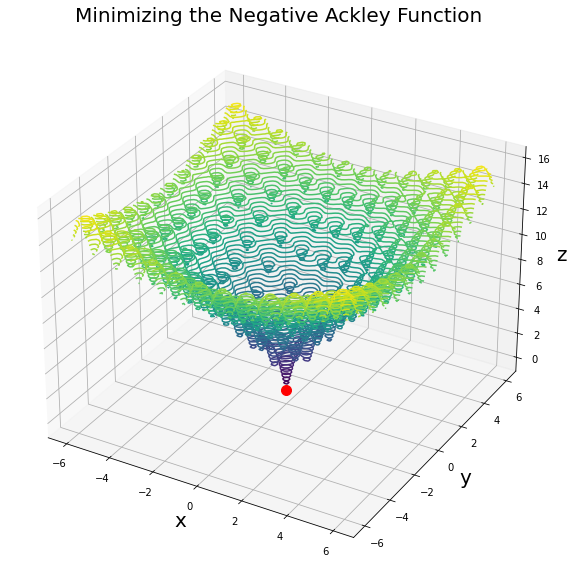

In [283]:
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)


X, Y = np.meshgrid(x, y)
Z = negative_ackley(X, Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter([0], [negative_ackley(0,0)], c ='r', s = 100)

ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.set_zlabel('z', fontsize = 20)
ax.set_title('Minimizing the Negative Ackley Function', fontsize = 20)
plt.show()

In [192]:
negative_ackley(0,0)

4.440892098500626e-16

The minimum seems to be located at $(0,0)$. We have that $f(0,0) = 0$.

### a) Evolution Strategy : CMA-ES

Using CMA-ES, we find a minimum of $-7.549517\times 10^{-15} \approx 0$ located at $(X_0,Y_0) = \left (6.244\times 10^{-16}, -2.273\times 10 ^{-15}\right) \approx (0,0) $. This confirms our observation here-above. The convergence plot of our algorithm can be found here-under.


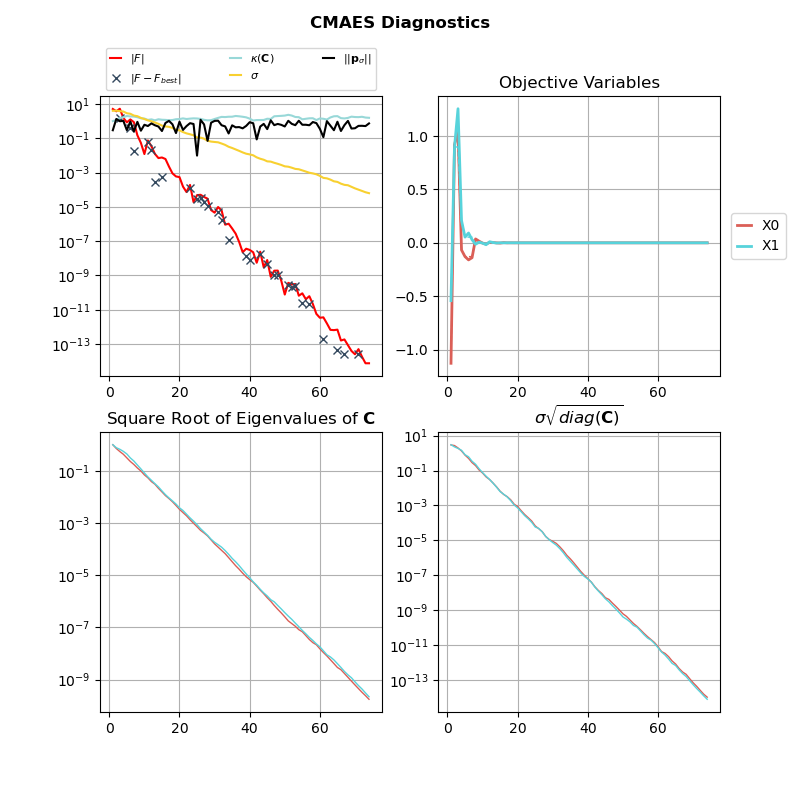




### b) Gradient Based Method

Let us compute the analytical expression of the negative ackley function's gradient. 

We have that :
$$f(x,y) = -20\exp(-0.2\sqrt{0.5(x^2 + y^2)}) - \exp(0.5*(\cos(2\pi x) + \cos(2\pi y))) + 20 + e$$
where $x, y \in \mathbb{R}$, and $e$ is the Euler number. 


Then, 

$$\frac{\partial f}{\partial x}(x,y) = \frac{2x}{\sqrt{0.5(x^2 + y^2)}}\exp(-0.2\sqrt{0.5(x^2 + y^2)}) + \pi \sin(2 \pi x)\exp(0.5*(\cos(2\pi x) + \cos(2\pi y))) $$\
$$\frac{\partial f}{\partial y}(x,y) = \frac{2y}{\sqrt{0.5(x^2 + y^2)}}\exp(-0.2\sqrt{0.5(x^2 + y^2)}) + \pi \sin(2 \pi y)\exp(0.5*(\cos(2\pi x) + \cos(2\pi y)))$$

and we have that : 

$$\nabla f(x, y) = \left [\frac{\partial f}{\partial x}(x,y),\frac{\partial f}{\partial y}(x,y)  \right]^T$$

In [347]:
def grad(X):
    x = X[0]
    y = X[1]
    grad_x = 2*x* np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2)))/(np.sqrt(0.5*(x**2 + y**2))) + np.pi * np.sin(2*np.pi*x)*np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    grad_y = 2*y* np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2)))/(np.sqrt(0.5*(x**2 + y**2))) + np.pi * np.sin(2*np.pi*y)*np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y)))
    return np.array([grad_x, grad_y])

old = 100
new = 0
eps = 1e-32
X = np.array([5,5])
x = X[0]
y = X[1]
t = 0
max_iter  = 300
alpha = 0.01
grads = []
positions = [[x, y]]

while abs(old - new) > eps and t <max_iter :
    old = negative_ackley(x, y)
    gradient = grad(X)
    grads.append(gradient)
    X = X - alpha*gradient
    x = X[0]
    y = X[1]
    positions.append([x,y])
    t += 1
    new = negative_ackley(x, y)


x_pos = [i[0] for i in positions]
y_pos = [i[1] for i in positions]

evals = [negative_ackley(i[0], i[1]) for i in positions]

print('Iterations: ', t)
print('Final position: ', X)
print('Minimum value found: ', negative_ackley(X[0], X[1]))

Iterations:  22
Final position:  [4.98618046 4.98618046]
Minimum value found:  12.632268991516


Convergence Plots for Our gradient Based Method


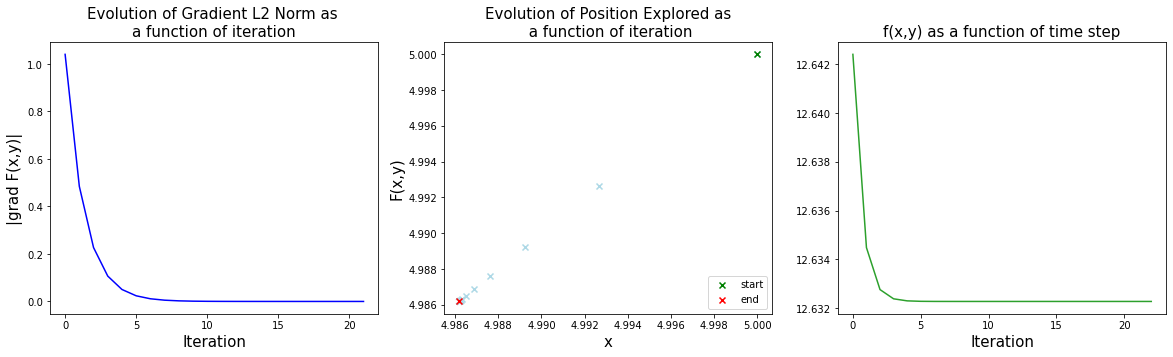

In [292]:
fig, axs = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)
norms_grad = [np.linalg.norm(i) for i in grads]

axs[0].plot(range(t), norms_grad, label = 'norm of gradient',c = 'b')
axs[0].set_title('Evolution of Gradient L2 Norm as \na function of iteration', fontsize = 15)
axs[0].set_xlabel('Iteration', fontsize = 15)
axs[0].set_ylabel('|grad F(x,y)|', fontsize = 15)

axs[1].scatter(x_pos, y_pos, c = 'lightblue', marker = 'x')
axs[1].scatter(x_pos[0], y_pos[0], c = 'g', marker = 'x', label = 'start')
axs[1].scatter(x_pos[-1], y_pos[-1], c = 'r', marker = 'x', label = 'end')
axs[1].set_title('Evolution of Position Explored as\n a function of iteration', fontsize = 15)
axs[1].set_xlabel('x', fontsize = 15)
axs[1].set_ylabel('y', fontsize = 15)
axs[1].legend(loc = 'lower right')

axs[2].plot(range(t + 1), evals, 'tab:green')
axs[2].set_title('f(x,y) as a function of time step', fontsize = 15)
axs[2].set_xlabel('Iteration', fontsize = 15)
axs[1].set_ylabel('F(x,y)', fontsize = 15)
print('Convergence Plots for Our gradient Based Method')

plt.show()

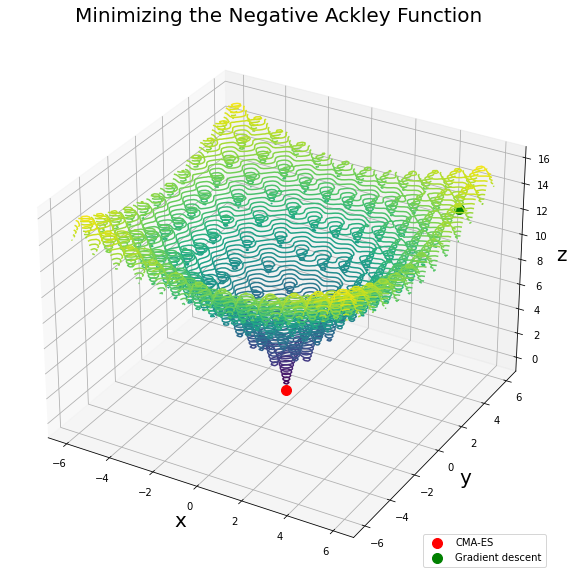

In [302]:
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)


X, Y = np.meshgrid(x, y)
Z = negative_ackley(X, Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter([0], [negative_ackley(0,0)], c ='r', label = 'CMA-ES', s = 100)
ax.scatter([x_pos[-1]], [y_pos[-1]], [negative_ackley(x_pos[-1], y_pos[-1])], c ='g', label = 'Gradient descent', s=100)


ax.contour3D(X, Y, Z, 50, cmap='viridis')
ax.set_xlabel('x', fontsize = 20)
ax.set_ylabel('y', fontsize = 20)
ax.set_zlabel('z', fontsize = 20)
ax.set_title('Minimizing the Negative Ackley Function', fontsize = 20)
ax.legend(loc = 'lower right')
plt.show()

We can see that our gradient descent method falls in the trap of a local minima whereas CMA-ES manage sto find the global minimum even though the initial positions are the same : $(5,5)$. We could improve our gradient based method by perhapse modifying our hyperparameter $\alpha$ as $\alpha(x, y, t)$ and make it vary as a function of the position and tiime step to ensure that our step size changes based on the functional context.

# Question 2: Corridor design for pedestrian traffic

The file ex2a.cpp runs a simulation of pedestrian traffic for given initial conditions.

The file ex2b.cpp consists in the application of a differential algorithm to find the obstacle positions that maximise pedestrian horizontal displacement. 

### a)

Here, we run the simulation with a randomly generated set of obstacle positions.

In [326]:
def average_x_displacement(X_2, X_1):
    sum = 0
    for i in range(10):
        sum += abs(X_2[i][0] - X_1[i])
    return sum/10

def plot_corridor(X_init, X_fin, obstacles, title_name = "Particles' Position after a duration 50"):
    
    fig = plt.figure(figsize=(10,5))
    
    for i in range(10):
        if i < 5:
            plt.scatter(X_init[i],Y_init[i], c = 'g' )
            plt.scatter(obstacles[i][0],obstacles[i][1], c = 'grey' ,s = 50)
            plt.scatter(X_fin[i][0],X_fin[i][1], c = 'lightgreen' )
        else:
            plt.scatter(X_fin[i][0],X_fin[i][1], c = 'coral')
            plt.scatter(X_init[i],Y_init[i], c = 'r')
    plt.axvline(x = -5, color = 'b', linestyle =":")
    plt.axvline(x = 5, color = 'b', linestyle =":", label = 'corridor')
    plt.scatter(X_init[0],Y_init[0], c = 'g', label = 'initial')
    plt.scatter(X_fin[0][0],X_fin[0][1], c = 'lightgreen', label = 'final')
    plt.scatter(X_init[7],Y_init[7], c = 'r', label = 'initial')
    plt.scatter(X_fin[7][0],X_fin[7][1], c = 'coral', label = 'final')
    plt.xlabel('x', fontsize = 15)
    plt.ylabel('y', fontsize = 15)
    plt.title(title_name, fontsize = 15)
    plt.legend(loc = 'best')
    plt.show()

Average horizontal displacement is :  48.44221


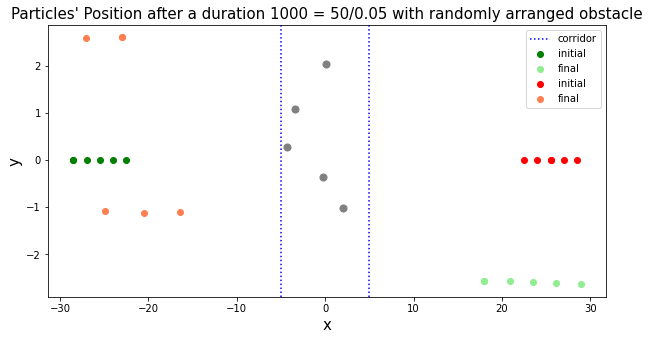

In [328]:
X_init = [-28.5, -27.0, -25.5, -24.0, -22.5, 22.5, 24.0, 25.5, 27.0, 28.5]
Y_init = [0]*len(X_init)

### the following were generated randomly 

obstacles = np.array( [[-3.39921,1.08641],
[0.0510252,2.04437],
[-0.29937,-0.361777],
[-4.27294,0.268635],
[2.00433,-1.01766]])


### these final points have been found by running our model in ex2a.cpp

X_fin = np.array(  [[18.0225,-2.56035],
[20.8957,-2.56163],
[23.5264,-2.57656],
[26.1259,-2.6085],
[28.9008,-2.63531],
[-27.0298,2.58878],
[-24.9074,-1.08022],
[-23.0161,2.59947],
[-20.5377,-1.12527],
[-16.4598,-1.1081]])
displacement =  average_x_displacement(X_fin, X_init)
print('Average horizontal displacement is : ',displacement)
plot_corridor(X_init, X_fin, obstacles, "Particles' Position after a duration 1000 = 50/0.05 with randomly arranged obstacle")

### b)

We want to find the positions of the 5 obstacles that maximise the average displacement of the particles in the $x$ direction. We want to maxmise the function $f$ as : 
$$f(\underline{x}(T), \underline{x}_0) = \frac{1}{10}\sum_{i}^{10}\lvert x_i(T) - x_i(0)\rvert$$
where $T$ is final time. Let us now find the best obstacle positions to maximise the horizontal displacement over T = $50 /\delta t  = 1000$ where $\delta t = 0.05$.


Using the differential evolution algorithm, with $NP = 8$, we obtain the following best positions for the obstacles. 

Maximal average horizontal displacement is :  49.595209999999994


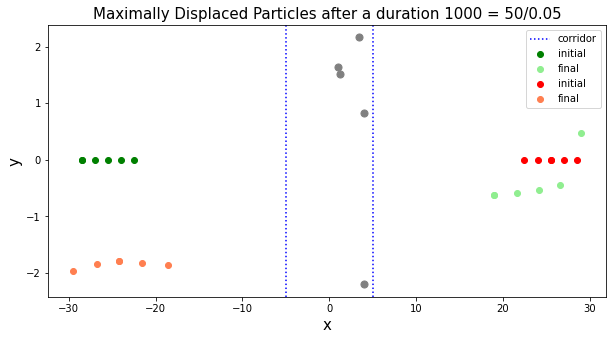

In [348]:
best_obstacles = np.array( [[3.40922,2.16217],
[3.99883,0.829755],
[3.98005,-2.20237],
[1.0691,1.63956],
[1.23513,1.51946]] )
    

X_fin_2 = np.array( [[18.9918,-0.617195],
[21.6715,-0.592555],
[24.1162,-0.536414],
[26.5343,-0.447381],
[28.9612,0.465551],
[-29.4666,-1.97164],
[-26.7702,-1.83248],
[-24.2249,-1.78777],
[-21.6046,-1.82696],
[-18.6108,-1.86264]])


max_displacement = average_x_displacement(X_fin_2, X_init) 
print('Maximal average horizontal displacement is : ', max_displacement)
plot_corridor(X_init, X_fin_2, best_obstacles, title_name = "Maximally Displaced Particles after a duration 1000 = 50/0.05")



We indeed obtain an average horizontal displacement larger than if the obstacles were in a random configuration.

# Question 3 : Optimal atoms configuration

In [260]:
def energy(x):
    E = 0
    n = len(x) // 3
    x = x.reshape((n,3))
    dx = np.subtract.outer(x[:,0], x[:,0])
    dy = np.subtract.outer(x[:,1], x[:,1])
    dz = np.subtract.outer(x[:,2], x[:,2])
    r2 = dx**2 + dy**2 + dz**2
    np.fill_diagonal(r2, 1) # fill diagonal with non zero to avoid division by zero
    r6inv = r2**(-3)
    r12inv = r6inv**2
    E = r12inv - r6inv
    np.fill_diagonal(E, 0)
    return 2 * np.sum(E)

def jac(x):
    m = len(x)
    F = [0] * m
    for i in range(0, m, 3):
        for j in range(i + 3, m, 3):
            dx = x[i] - x[j]
            dy = x[i + 1] - x[j + 1]
            dz = x[i + 2] - x[j + 2]
            r2 = dx**2 + dy**2 + dz**2
            if r2 != 0:
                r2inv = 1 / r2
                r4inv = r2inv * r2inv
                r8inv = r4inv * r4inv
                r14inv = r8inv * r4inv * r2inv
                f = 24 * r8inv - 48 * r14inv
                fx = dx * f
                fy = dy * f
                fz = dz * f
                F[i] += fx
                F[i + 1] += fy
                F[i + 2] += fz
                F[j] -= fx
                F[j + 1] -= fy
                F[j + 2] -= fz
    return np.array(F, dtype = float)

## Gradient Descent Implementation

In [332]:
def gradient_descent(X, alpha = 0.001, eps = eps, max_iter = max_iter):
    start = time.time()
    new = 0
    R = X.copy()
    old = 10
    ite  = 0
    while abs(old - new) > eps and ite < max_iter:
        old = energy(R)
        R -= alpha*jac(R)
        new = energy(R)
        ite += 1
    end = time.time()
    return R

## (1 + N) Evolution Srategy Optimisation

In [333]:
def plot(X_final, name):
    "generates a 3D scatter plot of our atoms' positions "
    fig =plt.figure(figsize=(10,10))
    ax = fig.add_subplot(projection='3d')
    
    m = len(X_final)
    X = [X_final[i] for i in range(0, m, 3)]
    Y = [X_final[i] for i in range(1, m, 3)]
    Z = [X_final[i] for i in range(2, m, 3)]
    for i in range(len(X)):
        xs = X[i]
        ys = Y[i]
        zs = Z[i]
        ax.scatter(xs, ys, zs, color = 'b')
    
    ax.set_xlabel('X', fontsize = 20)
    ax.set_ylabel('Y', fontsize = 20)
    ax.set_zlabel('Z',  fontsize = 20)
    ax.set_title(f'Optimal Configuration for N = {len(X_final)//3}',  fontsize = 20)
    plt.savefig(name)
    plt.show()
    
def make_children(parent, sigma):
    children = []
    for i in range(len(parent)):
        children.append(np.random.normal(loc=parent, scale=sigma))     
    return children

def adapt_sigma(sigma, success_ratio, boundlength):
    threshold = 0.01*boundlength
    if success_ratio > 0.2: # 1/5th rule
        sigma *= 1.2
    else:
        sigma *= 0.8
    
    if sigma < threshold : 
        sigma=0.5*boundlength
    return sigma

In [334]:
def ES_1_N(X, max_iter, eps):
    xbounds = [-1, 1]; ybounds = [-1, 1];zbounds = [-1,1]
    boundlength = max((xbounds[1]-xbounds[0]),(ybounds[1]-ybounds[0]), (zbounds[1]-zbounds[0]))

    parent = X.copy()
    
    new, ite, success = 0, 0, 0
    sigma, adapt_every = 0.1, 5
    max_generations = max_iter
    old, new = 10, 0 
    
    for gen in range(max_generations):
        old = energy(X)
        if abs(old - new) < eps:
            print('breaking !')
            break
            
        children = make_children(parent, sigma)
        
        Fp = energy(parent)
        Fc = [energy(child) for child in children]
        ibest = np.argmin(Fc)
        new_parent = children[ibest]
        
        if Fc[ibest] < Fp:
            parent = new_parent
            success += 1

        if gen % adapt_every == 0:
            success_ratio = success / adapt_every
            sigma = adapt_sigma(sigma, success_ratio, boundlength)
            success = 0
        ite += 1

    return parent

In [335]:
eps_s = 1e-3
max_iter = 5000
alpha = 0.005
eps_g = 1e-15
mini = {2: -1, 3: -3, 5: -9.103852, 8:-19.821489, 16: -56.815742, 32: -139.635524, 38: -173.92842651178944}
stoch_energies = []
stoch_positions = []
grad_energies = []
grad_positions = []

### Comparing both methods

In the cell here-under, we run the gradients descent and stochastic optimizatic techniques 5 times for each set of randomly generated $N$ atoms for $N$ in $[2, 3, 5, 8, 16, 32, 38]$, and keep the best score. We then keep the best performances of our gradient and stochastic based algorithms and plot them.


In [336]:
Ns = [2, 3, 5, 8, 16, 32, 38]
tries= 5

for N in Ns:
    print(f'N = {N}')
    print(f'   True minimum : {mini[N]}')
    
    grad_energy = []
    grad_pos = []
    
    stoch_energy = []
    stoch_pos = []
    for i in range(tries):
        X = np.random.normal(-1,1, size = 3*N).reshape(-1,1)
        X_G = gradient_descent(X, alpha = alpha, eps = eps_g, max_iter = max_iter)
        e_g = energy(X_G)
        print(f'   Gradient Descent : {e_g}')
        grad_energy.append(e_g)
        grad_pos.append(X_G)
        
        X_S = ES_1_N(X, eps = eps_s, max_iter = max_iter)
        e_s = energy(X_S)
        print(f'   Stochastic Optimization : {e_s}\n')
        stoch_energy.append(e_s)
        stoch_pos.append(X_S)
        
    grad_energies.append(min(grad_energy))
    grad_positions.append(grad_pos[np.argmin(e_g)])
    
    stoch_energies.append(min(stoch_energy))
    stoch_positions.append(stoch_pos[np.argmin(stoch_energy)])
    

N = 2
   True minimum : -1
   Gradient Descent : -0.0009291502694511207
breaking !
   Stochastic Optimization : -0.0008438354361489721

   Gradient Descent : -0.9999999999999999
   Stochastic Optimization : -0.9999999952437784

   Gradient Descent : -0.9999999999999998
   Stochastic Optimization : -0.999999999997338

   Gradient Descent : -0.9999999999999999
   Stochastic Optimization : -0.9999999999783946

   Gradient Descent : -0.0017486336083486365
   Stochastic Optimization : -0.9999999947195202

N = 3
   True minimum : -3
   Gradient Descent : -3.0
   Stochastic Optimization : -2.9998236671905296

   Gradient Descent : -2.9999999999999996
   Stochastic Optimization : -2.9998729898421903

   Gradient Descent : -3.0
   Stochastic Optimization : -2.999857904658799

   Gradient Descent : -3.0
   Stochastic Optimization : -2.999803203723241

   Gradient Descent : -3.0
   Stochastic Optimization : -2.9996503705904525

N = 5
   True minimum : -9.103852
   Gradient Descent : -3.0000007881

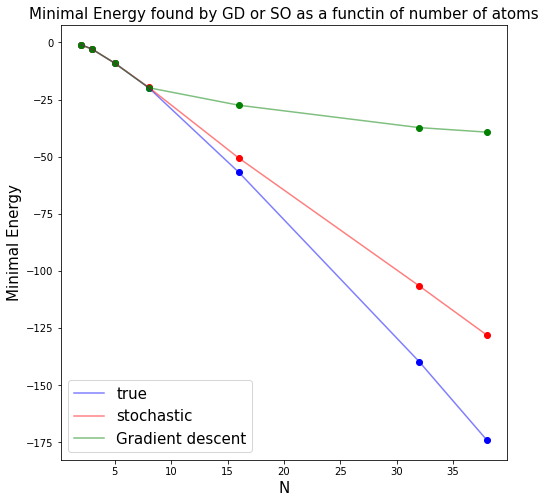

In [337]:
fig =plt.figure(figsize=(8,8))
plt.plot(Ns, list(mini.values()),alpha = 0.5, c = 'b', label = 'true')
plt.plot(Ns, stoch_energies, c = 'r',alpha = 0.5, label = 'stochastic')
plt.plot(Ns, grad_energies, c  = 'g',alpha = 0.5, label = 'Gradient descent')
plt.scatter(Ns, list(mini.values()), c = 'b')
plt.scatter(Ns, stoch_energies, c = 'r')
plt.scatter(Ns, grad_energies, c  = 'g')
plt.legend(loc = 'lower left', fontsize = 15)
plt.xlabel('N', fontsize = 15)
plt.ylabel('Minimal Energy', fontsize =15)
plt.title('Minimal Energy found by GD or SO as a functin of number of atoms', fontsize = 15)
plt.savefig(f'SO_vs_GD_{5}_tries')
plt.show()

We can see that for a 'low' number of atoms (N = 2, 3, 5, 8), stochastic and gradient based method manage to find an optimal configuration having a potential energy almost equal to the known minimum potential energy. 

In [343]:
print('Theoretical minimum energy for N = 2 is : ', mini[2])
print('Minimum Energy found for N = 2 with a gradient based method  is :', grad_energies[0])
print('Minimum Energy found for N = 2 with a stochastic method  is :', stoch_energies[0])
print('\n')
print('Theoretical minimum energy for N = 3 is : ', mini[3])
print('Minimum Energy found for N = 3 with a gradient based method  is :', grad_energies[1])
print('Minimum Energy found for N = 3 with a stochastic method  is :', stoch_energies[1])
print('\n')
print('Theoretical minimum energy for N = 5 is : ', mini[5])
print('Minimum Energy found for N = 5 with a gradient based method  is :', grad_energies[2])
print('Minimum Energy found for N = 5 with a stochastic method  is :', stoch_energies[2])
print('\n')
print('Theoretical minimum energy for N = 8 is : ', mini[8])
print('Minimum Energy found for N = 8 with a gradient based method  is :', grad_energies[3])
print('Minimum Energy found for N = 8 with a stochastic method  is :', stoch_energies[3])

Theoretical minimum energy for N = 2 is :  -1
Minimum Energy found for N = 2 with a gradient based method  is : -0.9999999999999999
Minimum Energy found for N = 2 with a stochastic method  is : -0.999999999997338


Theoretical minimum energy for N = 3 is :  -3
Minimum Energy found for N = 3 with a gradient based method  is : -3.0
Minimum Energy found for N = 3 with a stochastic method  is : -2.9998729898421903


Theoretical minimum energy for N = 5 is :  -9.103852
Minimum Energy found for N = 5 with a gradient based method  is : -9.103852415707557
Minimum Energy found for N = 5 with a stochastic method  is : -9.09416365744098


Theoretical minimum energy for N = 8 is :  -19.821489
Minimum Energy found for N = 8 with a gradient based method  is : -19.821489192154743
Minimum Energy found for N = 8 with a stochastic method  is : -19.630972290038677


However, as the number of atoms increases, we can see that our gradient based method reaches its limit and falls into local minima of low number of atoms. Indeed, we can see that for N = 16, 32 and 38, our gradient based method can't find significantly better configurations than the N = 16 or 32 atoms system. This is not the case for our $1 + N$ stochastic evolution strategy which manages to find better configurations than the gradient based method for high number of atoms. Indeed, it manages to find an optimal configuration with a potential energy of -128 J for N = 38 atoms, when the theoretical minima is around -173.92842651178944J.

We note that we can have different optimal configurations for our N particles giving the same minimal energy. Indeed, simpliy rotating our atoms along the z-axis will not change the overal potential energy of our system. In other words, there is an infinite amount of solutions that give a global minima for our potential energy. 